In [1]:
from keras.models import load_model
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
os.environ['SM_FRAMEWORK'] = "tf.keras"
import segmentation_models as sm

2023-12-01 19:07:34.496422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:07:36.839594: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-01 19:07:36.839698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-12-01 19:07:36.839709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Segmentation Models: using `tf.keras` framework.


In [11]:
total_loss = sm.losses.categorical_focal_jaccard_loss
jaccard_coef = sm.metrics.iou_score

In [2]:
model = load_model("models/landcover_99epochs.hdf5", compile=False)

2023-12-01 19:07:40.929752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-01 19:07:41.162758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/cv2/../../lib64:
2023-12-01 19:07:41.163101: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-01 19:07:41.164451: I tensorflo

In [4]:
import os

In [3]:
!nvidia-smi

Fri Dec  1 19:07:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX350           On  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8              N/A / ERR! |      6MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
image_path = 'Data/val_images/val/M-33-20-D-c-4-2.tifpatch_023.tif'

In [5]:
# image_path = 'tile_36.jpg'

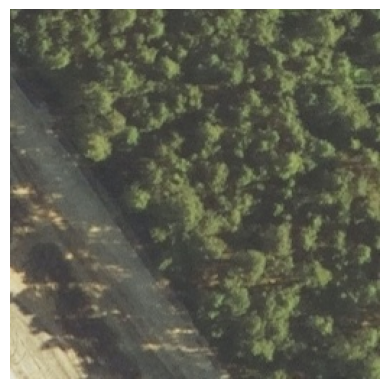

In [6]:
img = cv2.imread(image_path,1)
# img = cv2.resize(img, (256, 256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
img.shape

(256, 256, 3)

In [9]:
scaler = MinMaxScaler()

In [10]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [11]:
# img = (img - img.min()) / (img.max() - img.min())
img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
img = preprocess_input(img)  #Preprocess based on the pretrained backbone...

In [12]:
img.shape

(256, 256, 3)

In [13]:
in_img = img.reshape((1, 256, 256, 3))


In [14]:
in_img.shape

(1, 256, 256, 3)

In [15]:
pred = model.predict(in_img)
pred_margmax = np.argmax(pred,axis=3)

1/1 [==============================] - 1s 1s/step


In [16]:
pred_margmax[0].shape

(256, 256)

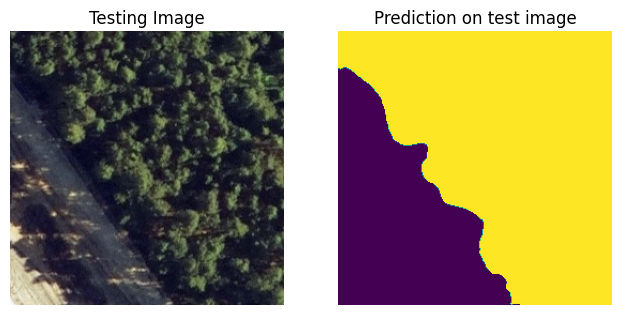

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(pred_margmax[0])
plt.axis('off')
plt.show()